## LOCATION BASED ANALYSIS

Shivani Goyal

Cognifyz Technologies

### IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

### READING THE DATASET

In [ ]:
df = pd.read_csv("/content/sample_data/Dataset  (1).csv")

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### LATITUDE AND LONGITUDE DISTRIBUTION ON MAP

In [ ]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(map)
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)
map_file_path = 'restaurants_map.html'
map.save(map_file_path)
IFrame(map_file_path, width=800, height=600)

### CONCENTRATION OF RESTAURANTS

In [ ]:
restaurants_by_city = df['City'].value_counts().head(10).reset_index(name='Count')
restaurants_by_locality = df['Locality'].value_counts().head(10).reset_index(name='Count')
colors = sns.color_palette("Set1")

### TOP 10 LOCALITIES BY RESTAURANTS

<ipython-input-24-faf909999c7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Locality', y='Count', data=restaurants_by_locality, palette='magma')


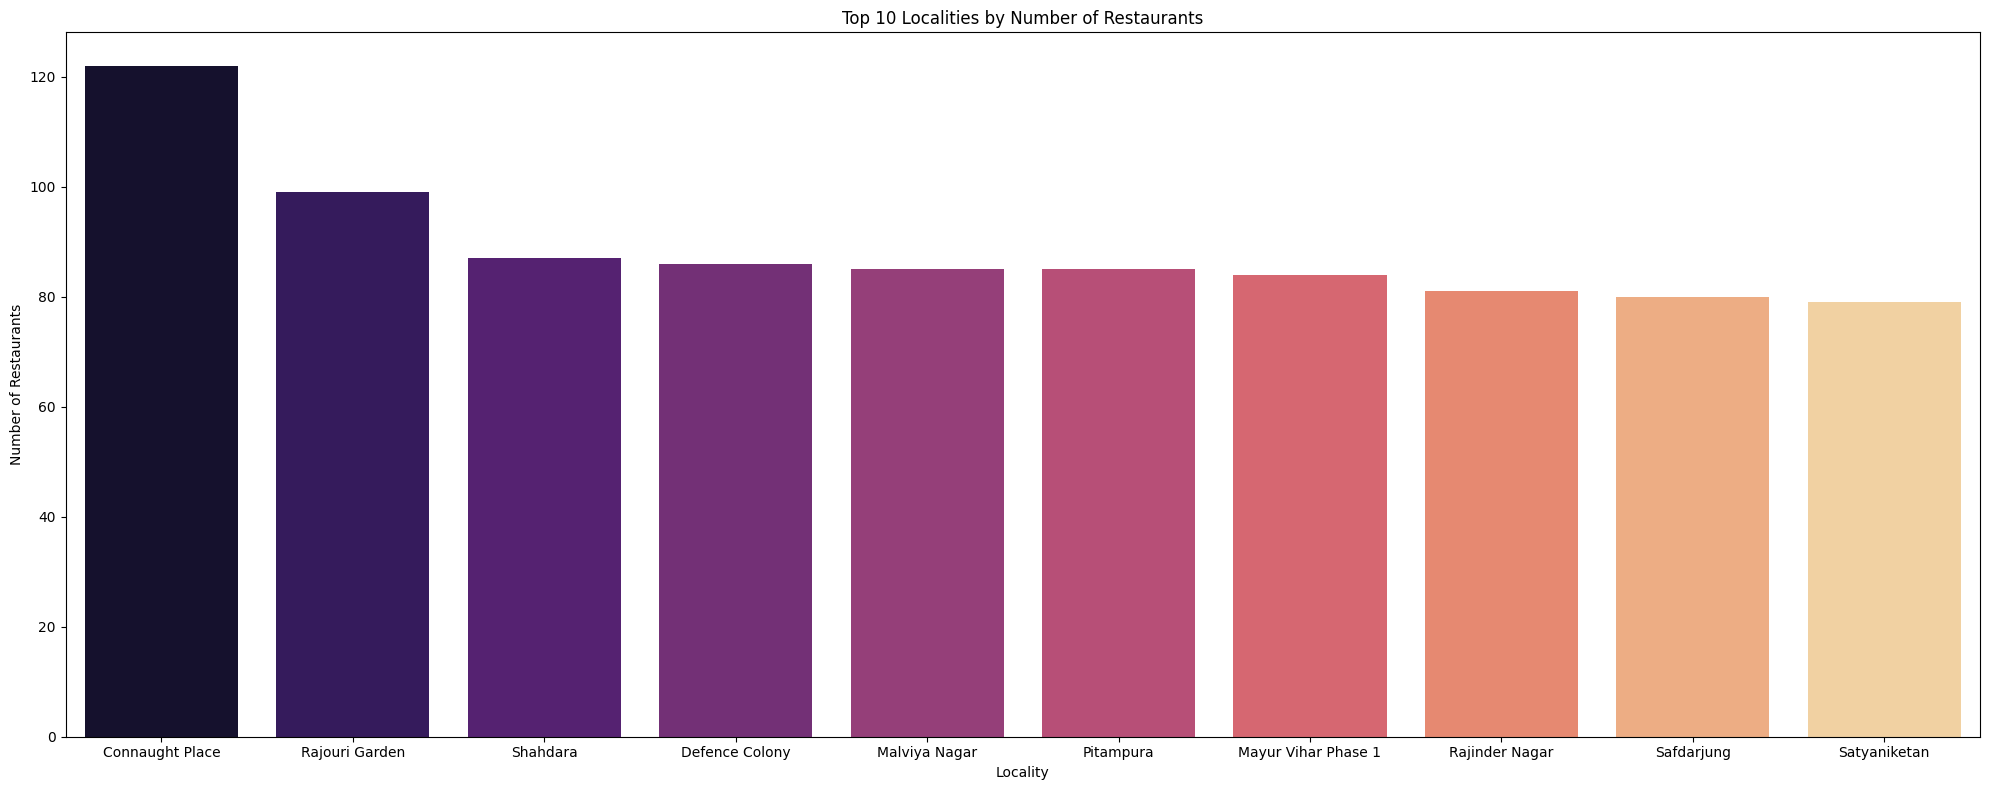

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Locality', y='Count', data=restaurants_by_locality, palette='magma')
plt.title('Top 10 Localities by Number of Restaurants')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

### TOP 10 CITIES BY NUMBER OF RESTAURANTS

<ipython-input-25-0cdca8943a56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Count', data=restaurants_by_city, palette='Set2')


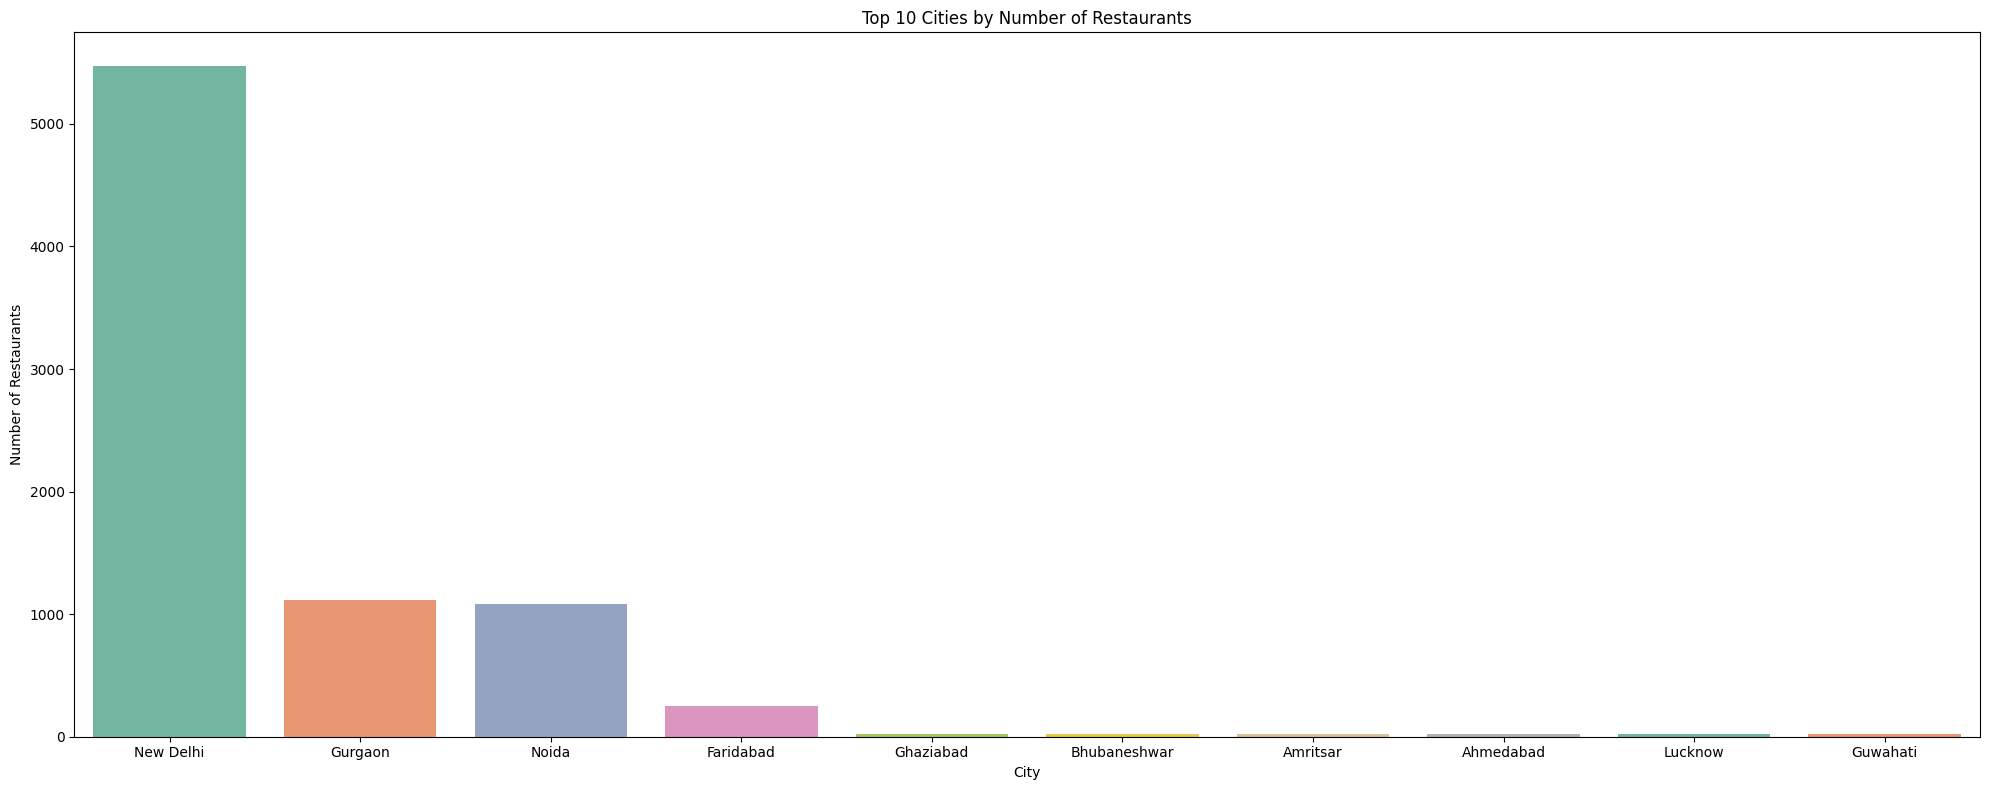

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Count', data=restaurants_by_city, palette='Set2')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

### AVERAGE RATINGS OF RESTAURANTS

In [ ]:
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_ratings_by_locality = df.groupby('Locality')['Aggregate rating'].mean().sort_values(ascending=False)

In [ ]:
print("Average Ratings by City:")
print(avg_ratings_by_city.head(10))
print("\nAverage Ratings by Locality:")
print(avg_ratings_by_locality.head(10))

Average Ratings by City:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

Average Ratings by Locality:
Locality
Pondok Aren                         4.9
Venetian Village, Al Maqtaa         4.9
Hotel Clarks Amer, Malviya Nagar    4.9
Bebek                               4.9
DIFC                                4.9
Beak Street, Soho                   4.9
The Milk District                   4.9
Kenwood                             4.9
Paia                                4.9
Taman Impian Jaya Ancol, Ancol      4.9
Name: Aggregate rating, dtype: float64


### TOP 10 CITIES BY AVERAGE RATING

<ipython-input-29-ea8d1726a015>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, palette='cividis')


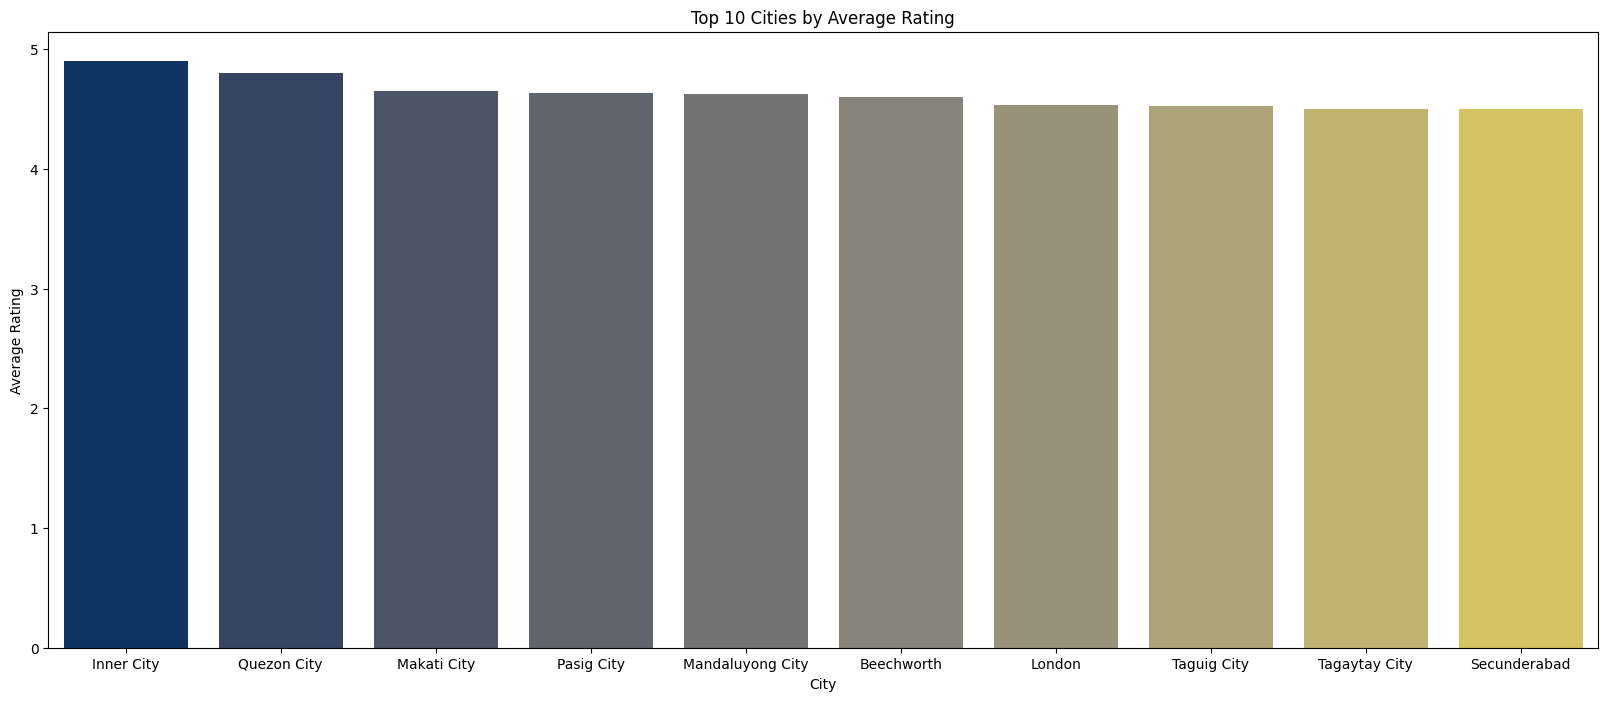

In [ ]:
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_ratings_by_city.index, y=avg_ratings_by_city.values, palette='cividis')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

### UNIQUE CUISINES IN RESTAURANTS

In [ ]:
unique_cuisines_by_city = df.groupby('City')['Cuisines'].nunique().sort_values(ascending=False)
unique_cuisines_by_locality = df.groupby('Locality')['Cuisines'].nunique().sort_values(ascending=False)

In [ ]:
print("\nUnique Cuisines by City:")
print(unique_cuisines_by_city.head(10))
print("\nUnique Cuisines by Locality:")
print(unique_cuisines_by_locality.head(10))


Unique Cuisines by City:
City
New Delhi     892
Gurgaon       362
Noida         248
Faridabad      87
Ahmedabad      21
Coimbatore     20
Jaipur         20
Sharjah        20
Des Moines     20
Colombo        20
Name: Cuisines, dtype: int64

Unique Cuisines by Locality:
Locality
Connaught Place           90
Rajouri Garden            71
Satyaniketan              61
Malviya Nagar             60
Defence Colony            55
Sector 18                 52
Safdarjung                52
Greater Kailash (GK) 1    50
Greater Kailash (GK) 2    50
Karol Bagh                47
Name: Cuisines, dtype: int64


### PRICE RANGE IN RESTAURANTS

In [ ]:
price_range_stats_by_city = df.groupby('City')['Price range'].describe()
price_range_stats_by_locality = df.groupby('Locality')['Price range'].describe()

In [ ]:
print("\nPrice Range Statistics by City:")
print(price_range_stats_by_city.head(10))
print("\nPrice Range Statistics by Locality:")
print(price_range_stats_by_locality.head(10))


Price Range Statistics by City:
           count      mean       std  min  25%  50%   75%  max
City                                                          
Abu Dhabi   20.0  3.300000  0.801315  2.0  3.0  3.5  4.00  4.0
Agra        20.0  2.650000  1.039990  1.0  2.0  3.0  3.25  4.0
Ahmedabad   21.0  2.571429  0.676123  1.0  2.0  3.0  3.00  4.0
Albany      20.0  1.700000  0.923381  1.0  1.0  1.0  2.00  4.0
Allahabad   20.0  2.650000  0.745160  1.0  2.0  3.0  3.00  4.0
Amritsar    21.0  1.809524  0.679636  1.0  1.0  2.0  2.00  3.0
Ankara      20.0  2.800000  0.615587  2.0  2.0  3.0  3.00  4.0
Armidale     1.0  2.000000       NaN  2.0  2.0  2.0  2.00  2.0
Athens      20.0  1.600000  0.820783  1.0  1.0  1.0  2.00  3.0
Auckland    20.0  3.050000  0.944513  1.0  3.0  3.0  4.00  4.0

Price Range Statistics by Locality:
                                                 count      mean       std  \
Locality                                                                     
 ILD Trade Centre 

### RESTAURANTS BY PRICE RANGE

<ipython-input-35-c3ab8a5c8dc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=df, palette='Set3')


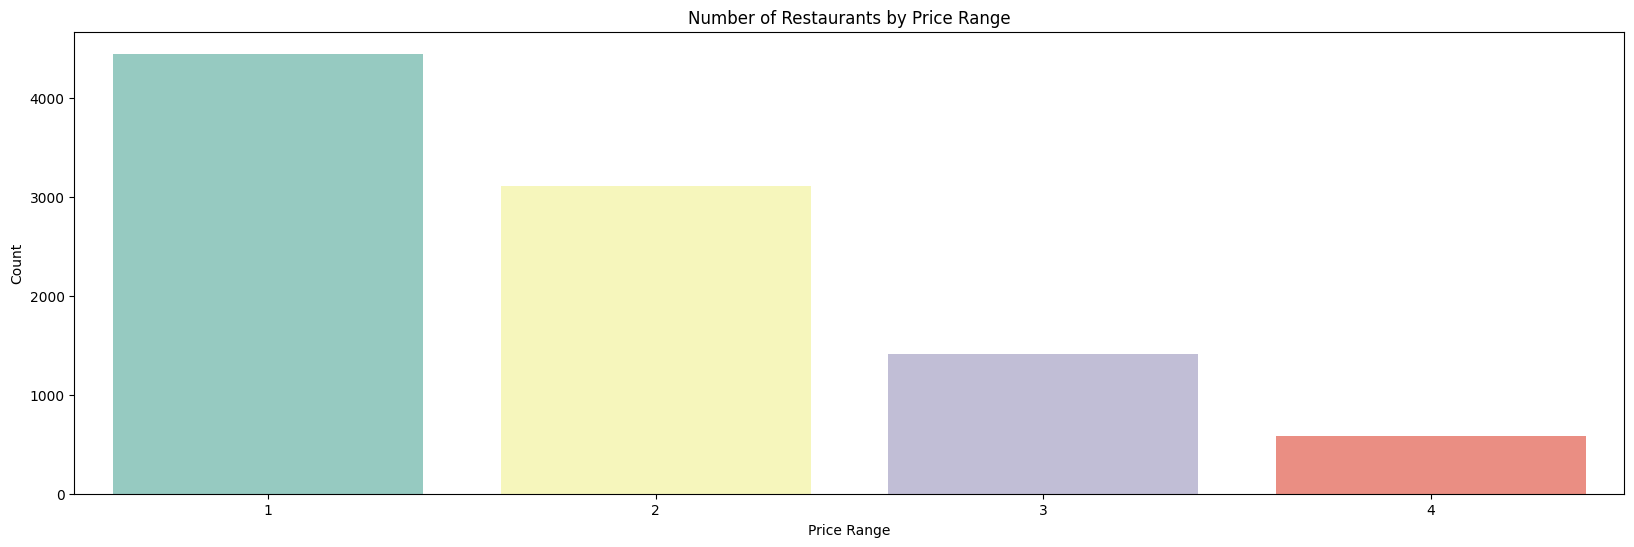

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Price range', data=df, palette='Set3')
plt.title('Number of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

<ipython-input-36-2acff455cf2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='GnBu')


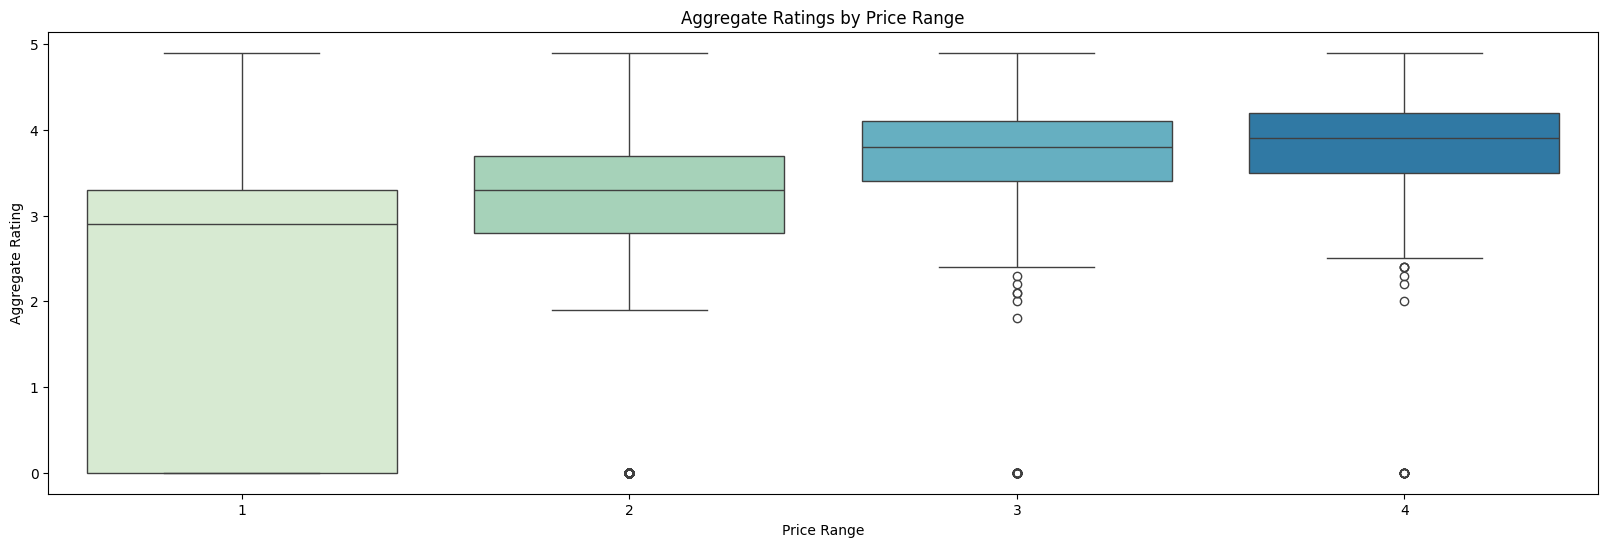

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='GnBu')
plt.title('Aggregate Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

<ipython-input-37-87d6cdb64e41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating text', data=df, palette='Set1')


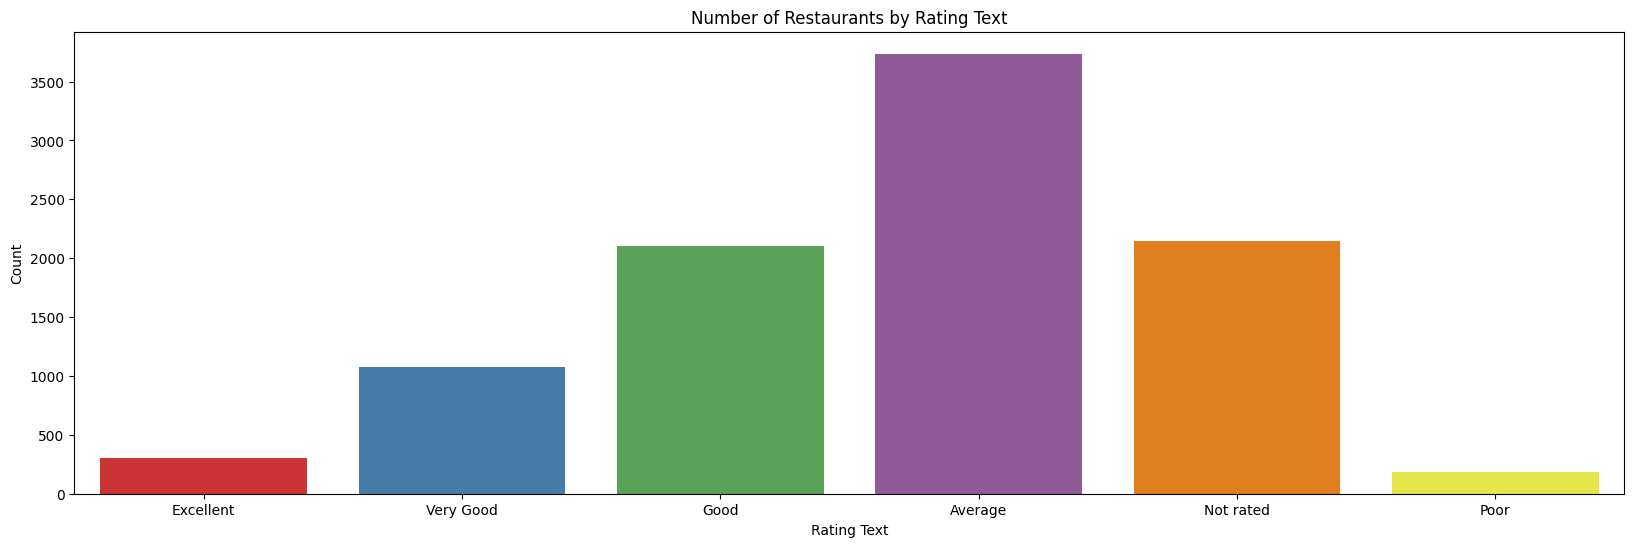

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Rating text', data=df, palette='Set1')
plt.title('Number of Restaurants by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.show()

### RESTAURANT LOCATION BY SCATTERPLOT

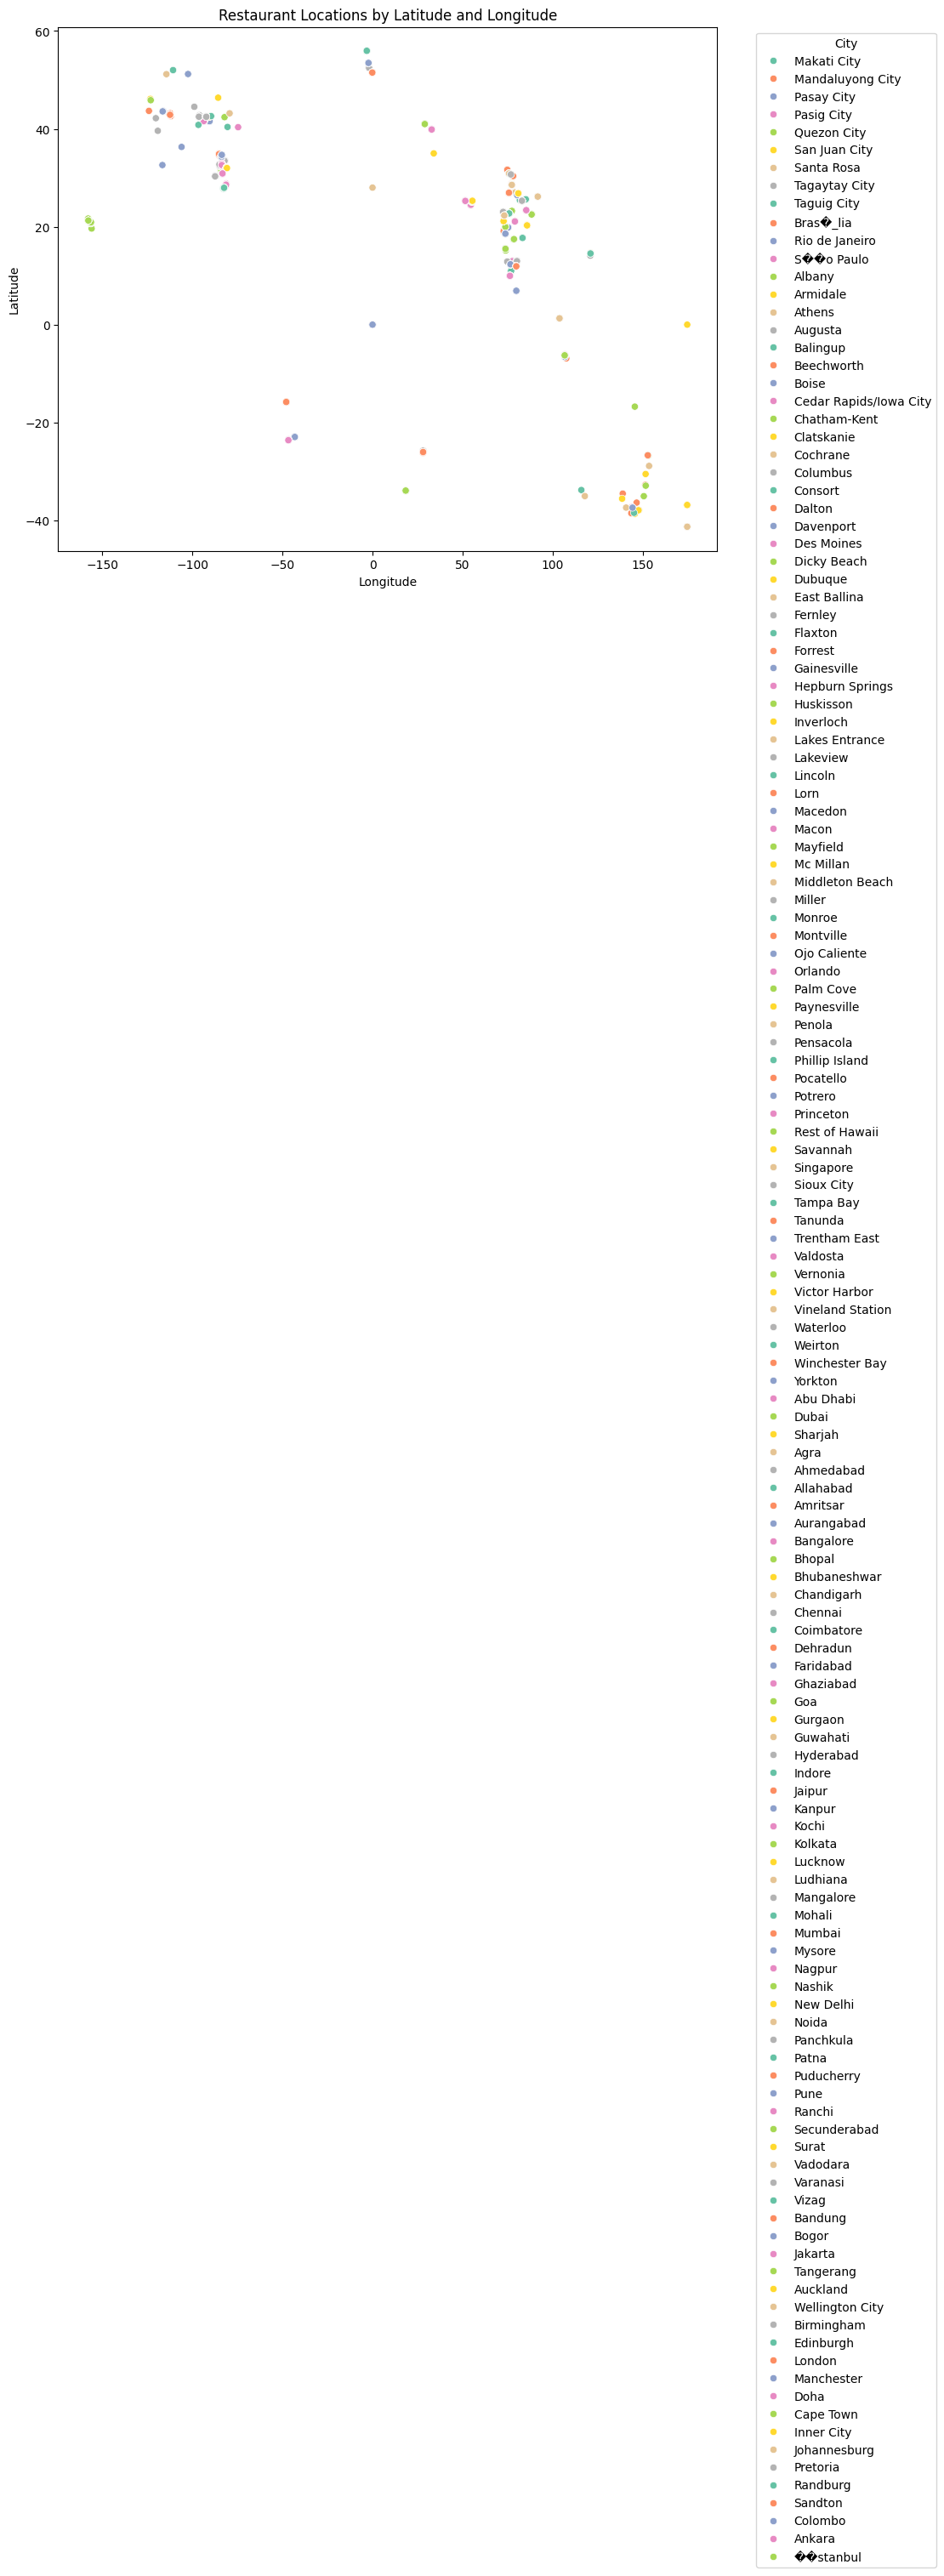

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='City', palette='Set2')
plt.title('Restaurant Locations by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()